In [50]:
import pandas as pd
import numpy as np
import gym
from policy_iteration import PolicyIteration
from control import *
import matplotlib.pyplot as plt

### Monte Carlo with Exploring Starts

In [6]:
env = gym.make('frozen_lake:fall-v0', map_name='small')
mc_eval = MonteCarloControl(env=env)
gamma = 0.5
policy = mc_eval.exploring_starts(gamma=gamma, nrof_episodes=1000)
print('action_set_name=default')
print(show_policy_game_board(policy, env.shape))
env = gym.make('frozen_lake:fall-v0', map_name='small', action_set_name='slippery')
mc_eval = MonteCarloControl(env=env)
gamma = 0.5
policy = mc_eval.exploring_starts(gamma=gamma, nrof_episodes=1000)
print('action_set_name=slippery')
print(show_policy_game_board(policy, env.shape))

action_set_name=default
[[2 2 1 1]
 [1 1 1 1]
 [2 2 1 1]
 [2 2 2 0]]
action_set_name=slippery
[[1 3 1 3]
 [0 1 2 0]
 [3 1 1 1]
 [2 2 2 0]]


### Monte Carlo On policy control


In [7]:
env = gym.make('frozen_lake:fall-v0', map_name='small')
mc_eval = MonteCarloControl(env=env)
gamma = 0.5
eps = 0.1
policy = mc_eval.policy_control(gamma=gamma, nrof_episodes=1000, eps=eps)
print('action_set_name=default')
print(show_policy_game_board(policy, env.shape))
env = gym.make('frozen_lake:fall-v0', map_name='small', action_set_name='slippery')
mc_eval = MonteCarloControl(env=env)
gamma = 0.5
policy = mc_eval.policy_control(gamma=gamma, nrof_episodes=1000, eps=eps)
print('action_set_name=slippery')
print(show_policy_game_board(policy, env.shape))

action_set_name=default
[[2 2 2 1]
 [3 3 3 1]
 [3 2 3 1]
 [3 3 1 0]]
action_set_name=slippery
[[0 3 2 3]
 [0 0 0 0]
 [3 1 1 2]
 [2 2 2 0]]


### Сравнение скорости сходимости к оптимальной политике

In [45]:
def get_mean_policy(env_type, alg_type='exploring_starts', nrof_exepriments=10, nrof_episodes=10):
    all_policy = []
    for i in range(nrof_exepriments):
        env = gym.make('frozen_lake:fall-v0', map_name=env_type)
        mc_eval = MonteCarloControl(env=env)
        if alg_type == 'exploring_starts':
            policy = mc_eval.exploring_starts(gamma=0.5, nrof_episodes=nrof_episodes)
        else:
            policy = mc_eval.policy_control(gamma=0.5, nrof_episodes=nrof_episodes, eps=0.1)
        all_policy.append(policy)

    all_policy = np.stack(all_policy).mean(axis=0)
    return all_policy



In [61]:
def get_error(map_name='small', alg_type='exploring_starts'):
    errors = []
    env = gym.make('frozen_lake:fall-v0', map_name=map_name)
    alg = PolicyIteration(env, gamma=gamma, eval_policy_th=0.0001)
    policy_value_iter, V, i = alg.value_iteration(th=0.00001)
    x = [10, 100, 500, 1000, 2000, 10000]
    for i in x:
        set_seed(i)
        mean_policy = get_mean_policy(env_type=map_name,alg_type=alg_type, nrof_exepriments=10, nrof_episodes=i)
        error = np.abs(policy_value_iter - mean_policy).sum()
        errors.append(error)
    return x, errors


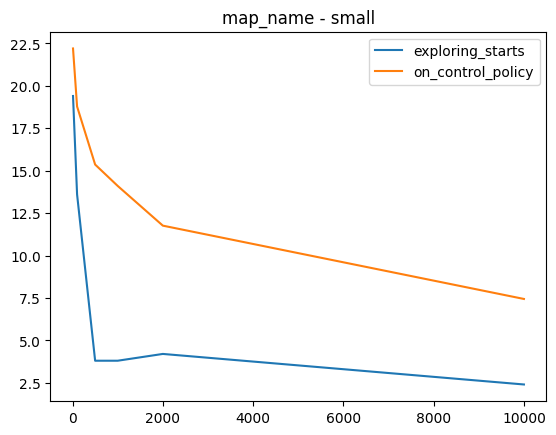

In [62]:
map_name = 'small'
x, exploring_start_errors = get_error(map_name=map_name, alg_type='exploring_starts')
x1, on_control_policy_erors = get_error(map_name=map_name, alg_type='on_control_policy')
plt.plot(x, exploring_start_errors, label='exploring_starts')
plt.plot(x1, on_control_policy_erors, label='on_control_policy')
plt.legend()
plt.title(f'map_name - {map_name}')
plt.show()

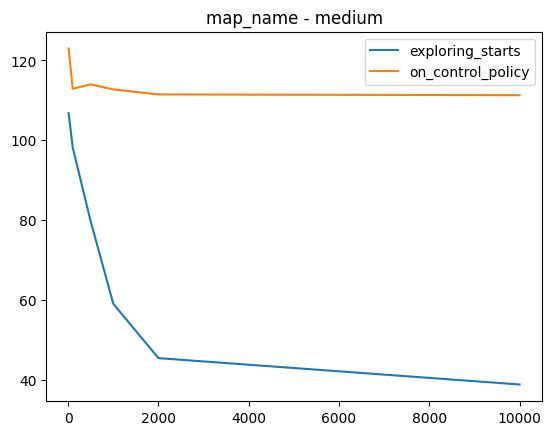

In [63]:
map_name = 'medium'
x, exploring_start_errors = get_error(map_name=map_name, alg_type='exploring_starts')
x1, on_control_policy_erors = get_error(map_name=map_name, alg_type='on_control_policy')
plt.plot(x, exploring_start_errors, label='exploring_starts')
plt.plot(x1, on_control_policy_erors, label='on_control_policy')
plt.legend()
plt.title(f'map_name - {map_name}')
plt.show()